## Vancouver Public Library - World Languages

The Vancouver Public Library is the third largest public library system in all of Canada. VPL has 20 branches in several locations spread across Vancouver & a central library. The central library carries material (books, e-books, DVDs, audio-books, magazines etc.) in several world languages - i.e., international languages other than English. The branches carry international language collections which are more representative of the demographics in that particular region

This project aims to scrape the website of Vancouver Public Library using automation test software in order to study the international language collection carried by each VPL location. In addition, the automated tool will scrape more than 70K+ records to gather information on the specific language collection, title, author, category, availability status and ratings of international material to draw insights. The motivation for the project stems from a general curiosity in reading, languages & an interest to explore the resources available in my locality

**References**
- https://www.vpl.ca/borrowing/world-languages
- https://en.wikipedia.org/wiki/Vancouver_Public_Library

In [6]:
# Libraries for HTML parsing, establishing website connections

from bs4 import BeautifulSoup 
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select

# Prevent overwhelming the server between connections

import time
from time import sleep 

# Libraries for data preparation & visualizations

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set(color_codes = True)

# Ignore printing warnings for general readability

import warnings 
warnings.filterwarnings("ignore")

In [7]:
# Open a webdriver & pass in the page URL

s = Service('/Users/rochitasundar/Downloads/chromedriver')
driver = webdriver.Chrome(service=s)
driver.get("https://www.vpl.ca/borrowing/world-languages") 

# Return information from webpage & make a beautiful soup object to parse the contents

page_source = driver.page_source 
soup = BeautifulSoup(page_source)

In [8]:
# The code below scrapes the list of all VPL locations from the website, cleans & stores the result in a list
# called locations

locations = []
for tag in soup.find_all('select', id='edit-field-location-term-tid'): 
    locations = tag.get_text(strip=True).replace("Choose your branch","").\
                replace("Library","Library\t").replace("Branch","Branch\t").strip().split("\t")

In [9]:
print(locations)

['Britannia Branch', 'Carnegie Branch', 'Central Library', 'Champlain Heights Branch', 'Collingwood Branch', 'Dunbar Branch', 'Firehall Branch', 'Fraserview Branch', 'Hastings Branch', 'Joe Fortes Branch', 'Kensington Branch', 'Kerrisdale Branch', 'Kitsilano Branch', 'Marpole Branch', 'Mount Pleasant Branch', 'nə́c̓aʔmat ct Strathcona Branch', 'Oakridge Branch', 'Renfrew Branch', 'South Hill Branch', 'Terry Salman Branch', 'West Point Grey Branch']


* There is 1 central library and 20 branch locations across Vancouver

In [10]:
# Code below enables interaction with the location drop down menu on the VPL webpage, and for each location,
# scrapes, cleans & stores the international language collection carried by that location

data = []
dist_language_collections = []

for branch_index in range(len(locations)): 
    driver.get("https://www.vpl.ca/borrowing/world-languages")
    
    select = Select(driver.find_element_by_xpath('//*[@id="edit-field-location-term-tid"]'))
    select.select_by_index(branch_index+1)            # branch_index is used to select different library locations
                                                      # from the drop down menu (identified by x_path)
    time.sleep(5)
    
    soup = BeautifulSoup(driver.page_source)
    
    print(str(branch_index+1)+")", locations[branch_index])    # prints library location
    
    for tag in soup.find_all('h3', class_="field-content"): 
        print("\t•",tag.get_text())                              # prints all international language collections 
        data.append((locations[branch_index],tag.get_text()))
        dist_language_collections.append(tag.get_text())
    
    print("\n")

1) Britannia Branch
	• Chinese Language Collection 中文 
	• French Language Collection française
	• Spanish Language Collection  


2) Carnegie Branch
	• Chinese Language Collection 中文 


3) Central Library
	• Arabic Language Collection العربية 
	• Chinese Language Collection 中文 
	• French Language Collection française
	• German Language Collection Deutsch 
	• Italian Language Collection italiano 
	• Japanese Language Collection 日本語 
	• Korean Language Collection 한국어 
	• Persian/Farsi Language Collection فارسی 
	• Polish Language Collection język polski 
	• Portuguese Language Collection português 
	• Russian Language Collection Русский 
	• Spanish Language Collection  
	• Tagalog Language Collection 
	• Vietnamese Language Collection Tiếng Việt 


4) Champlain Heights Branch
	• Chinese Language Collection 中文 
	• French Language Collection française


5) Collingwood Branch
	• Chinese Language Collection 中文 
	• French Language Collection  (Children) française


6) Dunbar Branch
	• Chinese

* It is interesting to note an age demographic associated with some of the international languages:
     * e.g. Collingwood branch carries French language collection, but only for Children
     * Joe Fortes Branch carries German, Persian & Spanish language collection, but only those suitable for adults etc.
     
     
* For ease of visualization & inference, we will clean the data to only contain international language information & not specifically age demographic information the material is suitable for

In [11]:
# Data cleaning to remove age-demographic information associated with language collection 

data_loc = pd.DataFrame(data, columns=['library_location','language_collection'])
data_loc["language_collection"] = data_loc["language_collection"].str.split("Collection").str.get(0)
data_loc.drop_duplicates(inplace=True)

In [12]:
# Code below defines a function which will be used throughout this notebook for visualizing data in a clean, 
# formatted manner 


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

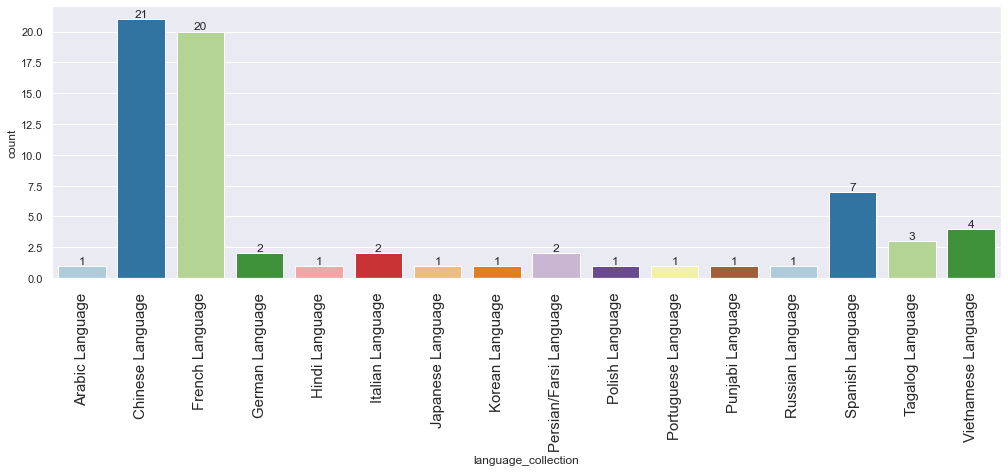

In [13]:
labeled_barplot(data_loc, "language_collection")

- The plot above shows the number of VPL locations that carry material belonging to 16 international languages. Interesting to note that:
     - All 21 locations carry material in Chinese Language
     - All but one, carry material in French Language
     - 7 locations carry Spanish, 4 locations carry Vietnamese & 3 locations carry Tagalog materials 
     - Materials in other international languages are carried by at max 1 or 2 library locations

Such an analysis can also give an insight to international demographic residing in different parts of Vancouver 

In [ ]:
# The code below is for crawler, which automates data collection i.e., information on language, title, author, 
# category, availability status & rating for 70K+ unique records

s = Service('/Users/rochitasundar/Downloads/chromedriver')
driver = webdriver.Chrome(service=s)
driver.get("https://www.vpl.ca/borrowing/world-languages") # accessing webpage 

select = Select(driver.find_element_by_xpath('//*[@id="edit-field-location-term-tid"]'))
select.select_by_index(0)
time.sleep(2)

dist_language_collections = sorted(list(set(dist_language_collections)))

for i in range(len(dist_language_collections)): # This loops over all languages available on webpage
    language_collection = []
    title = []
    author = []
    category = []
    status = []
    rating = []
    
    # The x_path below is to loacate specific language as identified by the loop above & 'click'
    # it to access all information corresponding to that language
    
    xpath = str('//*[@id="block-system-main"]/div/div[3]/ul/li[')+str(i+1)+str(']/div[1]/div[2]/a')
    driver.find_element_by_xpath(xpath).click()
    url_str = str(driver.current_url)
    url_str += "&sort=ugc_rating" # This modifies the url to sort all records by descending order of rating
    
    
    driver.get(url_str) 
    time.sleep(2)
    
    soup = BeautifulSoup(driver.page_source)
    
    
    # num_results reads the number of records available. This is divided by number of records per page i.e., 10
    # to calculate number of pages to loop over 
    
    num_results = int(soup.find('span', class_='cp-pagination-label').get_text().split(" ")[-2].replace(",",""))
    
    for page in range(num_results//10): # This loops over pages of records available for language identified
        page+=1                         # by outer loop
        
        if page ==1:
            url_str += "&page="+str(page)
        else:
            url_str = url_str.replace("&page="+str(page-1),"&page="+str(page)) # modify url to move to page
                                                                               # identified by inner loop
        driver.get(url_str)
        time.sleep(2)
        
        soup = BeautifulSoup(driver.page_source)          # create soup object recursively for a page 
                                                          # of records for a langauge
            
            
        for tag in soup.find_all('div', class_='col-md-10 item-column'): # for each record on the page 
           
            # store language information
            language_collection.append(dist_language_collections[i])
            
            # store title information
            title.append(tag.find('span',class_='title-content').get_text(strip=True))
            
            # store author information IF AVAILABLE 
            if tag.find('span',class_='cp-author-link'):
                author.append(tag.find('span',class_='cp-author-link').get_text(strip=True))
            else:
                author.append("not available")
                
            # store category information
            category.append(tag.find('div', class_='manifestation-item cp-manifestation-list-item row').\
              find('span',class_='cp-format-indicator').get_text(strip=True))
            
            # store availability-status information IF AVAILABLE
            if tag.find('span', class_='cp-availability-status'):
                status.append(tag.find('span', class_='cp-availability-status').get_text(strip=True))   
            else:
                status.append("not available") 
          
            # store rating information IF AVAILABLE
            if tag.find('span', class_='cp-rating-stars'):
                rating.append(tag.find('span', class_='cp-rating-stars').get_text(strip=True))
            else:
                rating.append("not available")
           
                
    # For EACH language, collect ALL data in a temporary pandas dataframe 
    data_temp = pd.DataFrame({'language_collection' : language_collection,
                                'title' : title,
                                'author': author,
                                'category' : category,
                                'status' : status,
                                'rating' : rating}, 
                                columns=['language_collection','title', 'author', 'category', 'status','rating'])
    
    
    # Store information for EACH language in individual excel sheets 
    
    filename = '/Users/rochitasundar/Desktop/Weclouddata/week2/web_scrapping/'+str(i)+'.xlsx'
    data_temp.to_excel(filename, index = False)
    
    # Go back to homepage, so the outer loop can 'click' next language & gather records on all pages of 
    # that language
    
    driver.get("https://www.vpl.ca/borrowing/world-languages")
    select = Select(driver.find_element_by_xpath('//*[@id="edit-field-location-term-tid"]'))
    select.select_by_index(0)
    time.sleep(2)

In [15]:
# There are multiple excel sheets of data corresponding to individual languages. These are read to a single 
# pandas dataframe data_lang

dist_language_collections = sorted(list(set(dist_language_collections)))

data_lang = pd.DataFrame()
df = pd.DataFrame()

for i in range(len(dist_language_collections)):
    filename = '/Users/rochitasundar/Desktop/Weclouddata/week2/web_scrapping/'+str(i)+'.xlsx'
    df = pd.read_excel(filename)
    data_lang = data_lang.append(df)    

Data collected has age demographic information associated with some languages, i.e., some languages have information that material is suited only for children or only for adults. However, for ease of visualization & inference, we will (as before), clean the data to only contain language information & no age demographic information 

In [16]:
# Data cleaning to remove age-demographic information associated with language collection 

data_lang["language_collection"] = data_lang["language_collection"].str.split("Collection").str.get(0)
data_lang.drop_duplicates(inplace=True)

In [17]:
data_lang.shape

(71395, 6)

- There are 71,395 rows and 6 columns of data 

In [18]:
# viewing random 7 rows 

data_lang.sample(7 , random_state = 1)

,language_collection,title,author,category,status,rating
158,Italian Language,Ossessione,not available,DVD,All copies in use,4.15 out of 5 stars
1807,French Language,Sam le marin fait le comique,"Eggleton, Jill",Book,Available,3.5 out of 5 stars
1623,German Language,Psyche? Hat doch jeder!,"Kuhlmann, Lena",Book,Available,not available
1146,Russian Language,Ubiĭstvennyĭ greĭpfrut,"Levitina, Natalii͡a",Book,Available,not available
345,Chinese Language,醫門小懶蟲,"艾佟•Ai, Tong",Book,Available,5 out of 5 stars
16746,French Language,La colère de la Dame blanche,"Bonin, Pierre-Alexandre",eBook,Available,not available
21031,French Language,Secret,"Tonogai, Yoshiki",Comic Book,Available,not available


The collected data will need to be further cleaned. e.g., rating information is stored as "not available" or as "4.15 stars out of 5 stars", "3.5 starts out of 5 stars" etc. This will be cleaned to only have numerical results such as 0, 1, 2, 3, 4, 5 or number -1 if information is not available, so statistical analysis can be performed for further inference

In [19]:
# cleaning rating attribute of data 

data_lang['rating'] = data_lang['rating'].replace(['not available'], '-1') # replace 'not available with -1'

new = data_lang["rating"].str.split(" ", n = 1, expand = True) # for other ratings, we only need the first number
data_lang["rating"] = new[0]

# round all numerical ratings to 0 place of decimal 
data_lang['rating'] = data_lang['rating'].astype(float).round(1).astype(int)

Further, author information will need to be cleaned up. Some authors have names in native language & english both while other authors only have names in english. e.g., author at index 345 above is 艾佟•Ai, Tong which includes name in native language, followed by '•', followed by name in english language

In [20]:
# cleaning author attribute of data to include only english names 

new = data_lang[data_lang["author"].str.contains("•")]["author"].str.split("•", n = 1, expand = True)
data_lang.loc[data_lang.author.str.contains("•")==True, 'author'] = new[1]

In [21]:
# re-viewing the 7 random rows after cleaning rating & author attributes 

data_lang.sample(7 , random_state = 1)

,language_collection,title,author,category,status,rating
158,Italian Language,Ossessione,not available,DVD,All copies in use,4
1807,French Language,Sam le marin fait le comique,"Eggleton, Jill",Book,Available,3
1623,German Language,Psyche? Hat doch jeder!,"Kuhlmann, Lena",Book,Available,-1
1146,Russian Language,Ubiĭstvennyĭ greĭpfrut,"Levitina, Natalii͡a",Book,Available,-1
345,Chinese Language,醫門小懶蟲,"Ai, Tong",Book,Available,5
16746,French Language,La colère de la Dame blanche,"Bonin, Pierre-Alexandre",eBook,Available,-1
21031,French Language,Secret,"Tonogai, Yoshiki",Comic Book,Available,-1


Rating & author attributes have been cleaned up

During data collection, a condition was included to have 'not available' appeneded if data was not available for 'author', 'status', 'rating' for any of the records.. 
Checking for null values in the collected data:

In [22]:
data_lang.isnull().sum()

language_collection     0
title                  26
author                  0
category                0
status                  0
rating                  0
dtype: int64

Of the 71,395 records, 26 records have no title information collected. As a record with missing title information makes little sense, these will be dropped from analysis

In [23]:
data_lang.dropna(inplace = True)

In [24]:
data_lang.isnull().sum().sum()

0

All the missing values have been treated 

In [25]:
data_lang.shape

(71369, 6)

The final dataset has 71,369 rows and 6 colums. Proceeding with visualization analyses:

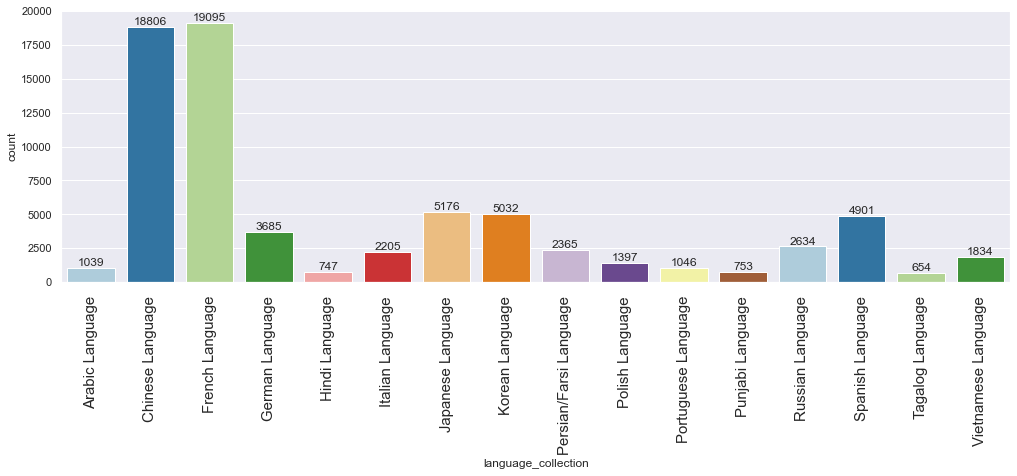

In [237]:
# How many (count of -) materials available at VPL for each international language

labeled_barplot(data_lang, 'language_collection')

- Maximum material is available in French & Chinese languages (19K & 18K +), followed by Japanese & Korean languages (5K +)
- Tagalog, Hindi & Punjabi languages have some of the lowest number of material available

Let's look at the top 10 authors by the number of published books available at VPL for Chinese, French, Japanese, Korean & Spanish languages 

Chinese Language 



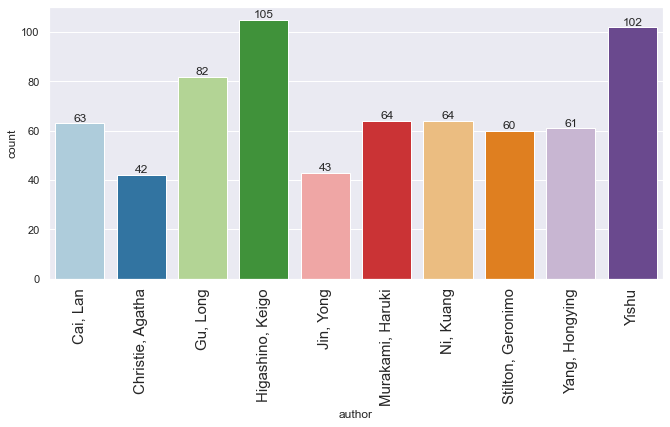

French Language 



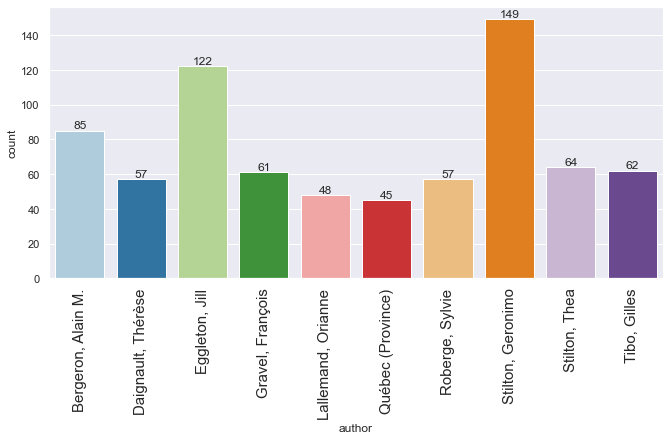

Japanese Language 



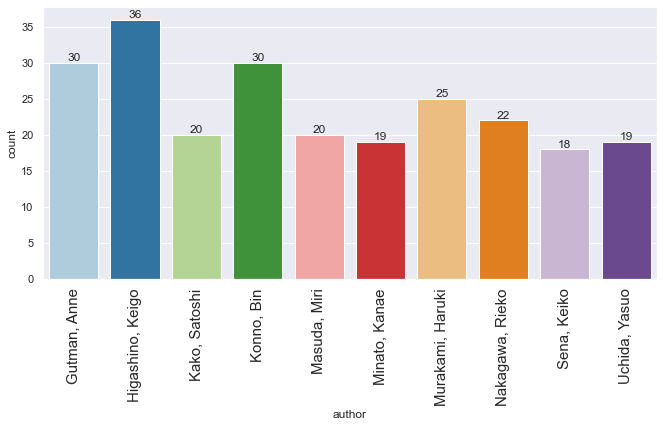

Korean Language 



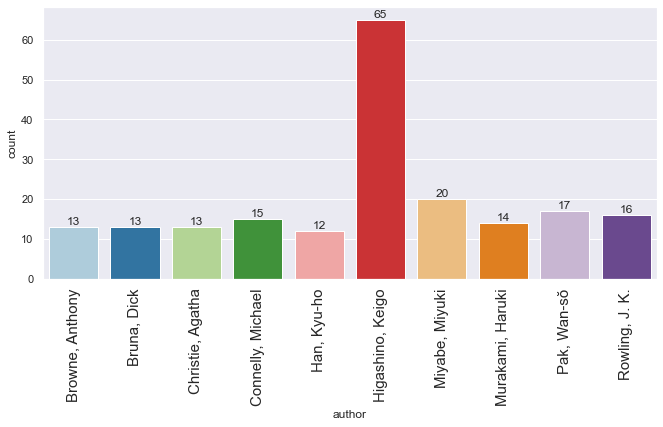

Spanish Language 



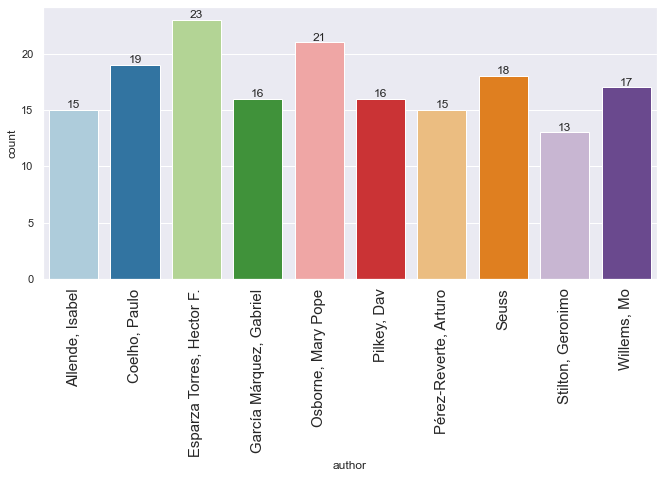

In [26]:
data_lang['language_collection'] = data_lang['language_collection'].astype('category')

top_languages = ['Chinese Language', 'French Language', 'Japanese Language', 'Korean Language', 'Spanish Language']

# Print top 10 authors for top_languages by number of published books at VPL, also exclude records where author
# information is not available

for lang in top_languages:
    print(lang, "\n")
    labeled_barplot(data_lang[(data_lang['author']!='not available') & (data_lang['language_collection'].str.startswith(lang))],
                   'author',
                    n=10)

-  'Higashino, Keigo' & 'Yishu' are top Chinese artists with 100+ materials avaialble at VPL locations
-  'Stilton, Geronimo' & 'Eggleton, Jill' are top French artists with 140+ & 120+ materials available at VPL locations respectively
-  The top 10 Japanese artists have more or less similar number of materials, between 18 and 36 avaialble at VPL locations
- 'Higashino, Keigo' is the top Korean artist with maximum number of materials i.e., 60+ available at VPL locations
- The top 10 Spanish artists have more or less similar number of materials, between 13 and 23 avaialble at VPL locations
- Interestingly, 'Higashino, Keigo' makes an appearance (# 1) under all Chinese, Japanese & Korean languages!!


Similar analysis can be extended for all 16 international languages likewise.... 

Let's look at all of unique categories that the materials at VPL belong to -

In [27]:
data_lang["category"].unique()

array(['Book', 'Unknown', 'Audiobook CD', 'DVD', 'Music CD',
       'Blu-ray Disc', 'Streaming Video', 'Board Book',
       'Audiobook on MP3 CD', 'Magazine or Journal', 'Comic Book',
       'eBook', 'Book Plus CD', 'Large Print', 'Printed Music',
       'Website or Online Data', 'Map', 'CD-ROM or DVD-ROM', 'Newspaper',
       'Video Cassette', 'Video Game', 'Downloadable Audiobook'],
      dtype=object)

There are 22 unique categories. Let's visualize percentage of materials in each language belonging to these categories 

In [28]:
# The code below defines a function to plot a stacked barplot & will be called throughout the notebook for making
# clean & formatted visualizations

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

category                 Audiobook CD  Audiobook on MP3 CD  Blu-ray Disc  \
language_collection                                                        
All                               969                  372            55   
Spanish Language                  140                    5             5   
Polish Language                     9                    4             2   
Vietnamese Language                83                    1             0   
Tagalog Language                    1                    0             0   
Russian Language                   10                    2             2   
Punjabi Language                    0                    0             0   
Portuguese Language                 5                    3             0   
Arabic Language                    17                    6             1   
Chinese Language                  325                  238             8   
Korean Language                     7                   16             1   
Japanese Lan

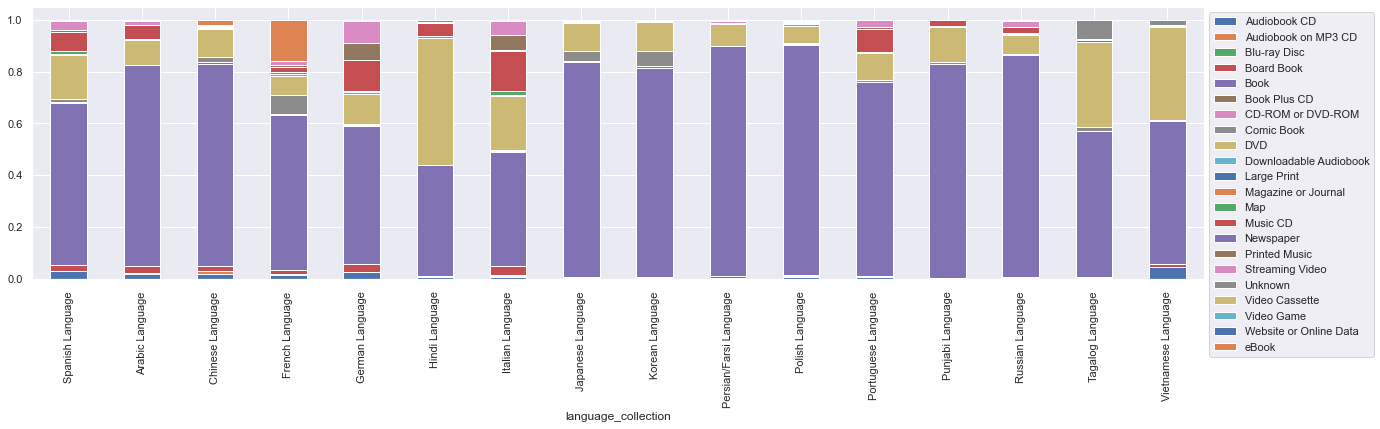

In [29]:
stacked_barplot(data_lang, 'language_collection', 'category')

Visualization is a little messy as there are over 20+ categories.. To ease visualization, we can combine some of these categories together

   - Book, Book Plus CD can be combined together as "Book"
   - Audiobook CD, Audiobook on MP3, Downloadable Audiobook can be combined together as 'Audiobook'
   - Blu-ray Disc, CD-ROM or DVD-ROM, DVD can be combined together as 'DVD'
   - Newspaper, Magazine or Journal can be combined together as 'Newspaper, Magazine or Journal'
   - Unknown, Video Cassette, Video Game, Website or Online Data, Printed Music, Large Print, Map can be combined together as 'Other'

In [30]:
# cleaning category attribute of data

data_lang["category"] = data_lang["category"].\
replace(["Book", "Book Plus CD"], "Book")

data_lang["category"] = data_lang["category"].\
replace(["Audiobook CD", "Audiobook on MP3 CD", "Downloadable Audiobook"], "Audiobook")

data_lang["category"] = data_lang["category"].\
replace(["Blu-ray Disc", "CD-ROM or DVD-ROM", "DVD"], "DVD")

data_lang["category"] = data_lang["category"].\
replace(["Newspaper", "Magazine or Journal"], "Newspaper, Magazine or Journal")

data_lang["category"] = data_lang["category"].\
replace(["Unknown", "Video Cassette", "Video Game", "Website or Online Data", "Printed Music", \
        "Large Print", "Map"], "Other")

In [31]:
data_lang["category"].unique()

array(['Book', 'Other', 'Audiobook', 'DVD', 'Music CD', 'Streaming Video',
       'Board Book', 'Newspaper, Magazine or Journal', 'Comic Book',
       'eBook'], dtype=object)

category has been cleaned up

category                 Audiobook  Board Book   Book  Comic Book   DVD  \
language_collection                                                       
All                           1342        1075  50310        2383  8345   
French Language                318         337  11488        1415  1380   
Chinese Language               563         362  14813         371  2043   
German Language                 98         102   1990           9   430   
Spanish Language               146         112   3082          61   841   
Japanese Language               18           0   4324         191   571   
Italian Language                20          77    986           2   469   
Russian Language                12           5   2265           6   196   
Vietnamese Language             84          23   1015           1   658   
Polish Language                 13           2   1251           4    95   
Korean Language                 23           9   4093         300   561   
Hindi Language           

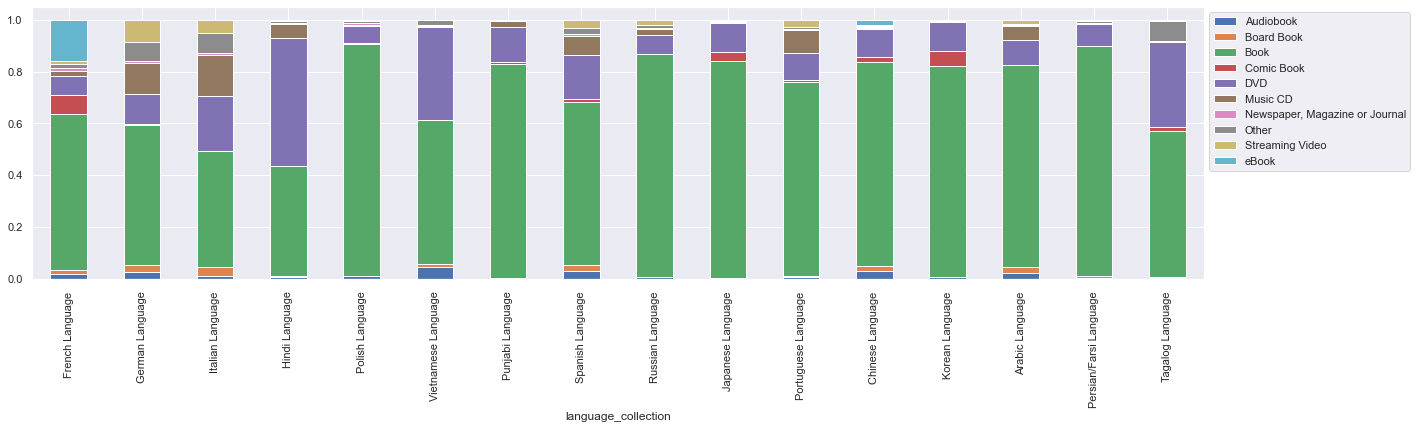

In [32]:
stacked_barplot(data_lang.sort_values("language_collection"), 'language_collection', 'category')

- ~60% of material in Hindi language is DVDs. Italian, Vietnamese, & Tagalog languages have ~20%, ~40% and ~30% of their material as DVDs
- Italian and German languages have ~10% of the material as Music CDs and ~5% of the material as streaming video!
- French has ~20% of the material available as ebooks, more so than any other languages
- Korean (~5% of material), French & Japanese languages have more comic books than other languages

"Higashino, Keigo" was found to be the most popular artist in terms of number of published materials at VPL for several asian languages like Chinese, Japanese, Korean etc. Let's see the variation in his published work by language & rating/popularity! 

rating                -1  1  2   3   4   5  All
language_collection                            
All                   78  2  8  51  54  17  210
Chinese Language      19  1  5  40  30  10  105
Korean Language       43  1  2   3  11   5   65
Japanese Language     12  0  1   8  13   2   36
Vietnamese Language    4  0  0   0   0   0    4
------------------------------------------------------------------------------------------------------------------------


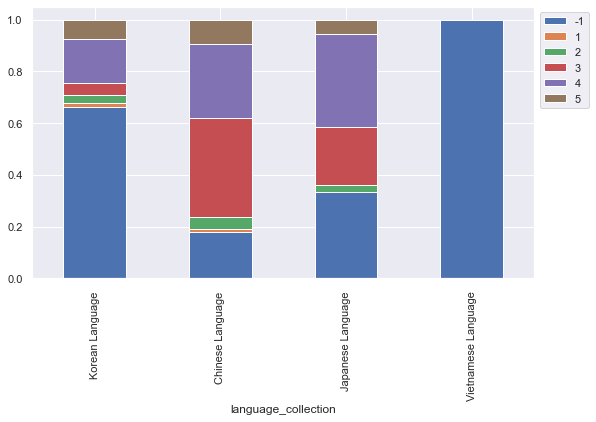

In [33]:
stacked_barplot(data_lang[data_lang["author"]=="Higashino, Keigo"], 'language_collection', 'rating')

- "-1" rating corresponds to "no rating information available". No rating information is available for any of his 4 materials in Vietnamese language. ~60% of his work in Korean language, ~20% of his work in Chinese language & ~30% of his work in Japanese language is not rated 
- ~40% of his work in Chinese language has a rating of 3 stars, ~25% has a rating of 4 stars and ~5% a rating of 5 stars...

Let's explore the attribute, availability status

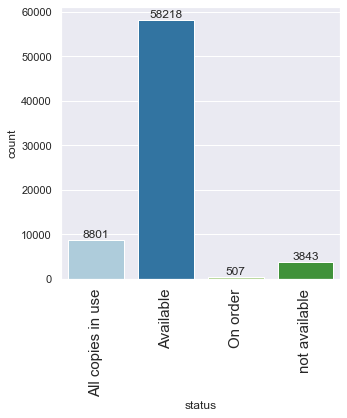

In [34]:
labeled_barplot(data_lang,"status")

- Majority of the materials are 'available', followed by 'all copies in use', followed by 'status not available' & then 'on order'

Extending this analysis to also include category (i.e., category-availabilityStatus analysis) 

status                          All copies in use  Available  On order  \
category                                                                 
All                                          8801      58218       507   
Book                                         6894      42950       434   
DVD                                           839       7463        42   
Board Book                                    135        922        18   
Comic Book                                    515       1857         7   
Music CD                                      153       1772         6   
Audiobook                                      91       1249         0   
Newspaper, Magazine or Journal                 41        350         0   
Other                                          52       1074         0   
Streaming Video                                 1          1         0   
eBook                                          80        580         0   

status                          not a

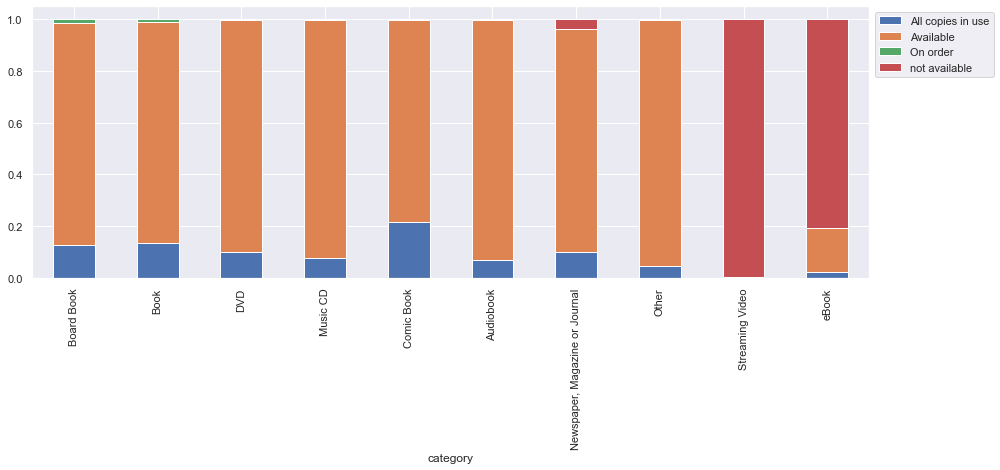

In [35]:
stacked_barplot(data_lang, "category", "status")

- No status information is available for a major percentage of Streaming video & eBooks and small percentage of newspaper, journals
- Out of 8801 materials with all copies in use, 6894 are books (78%), 839 are DVDs (9.5%), 515 are comic books (5%), 135 are board books (1.5%), 153 are music CDs, 91 audiobooks, & 80 eBooks... 

Finally, let's explore the author's who have an avg. rating of 4 or above & and list top 10 such author's by the number of their materials available at VPL

In [36]:
# The below code groups author's, find's the avg rating for each author; and filters to only have author's
# with an avg rating of 4 or 5

authors_highAvgRating = data_lang.groupby("author").mean().sort_values("rating", ascending = False)
authors_highAvgRating[authors_highAvgRating["rating"]>=4].reset_index()

,author,rating
0,"Li, Bubai",5.0
1,"Martin, Catherine",5.0
2,Binghe,5.0
3,Binghan,5.0
4,"Guillebeau, Chris",5.0
...,...,...
1705,"Zhang, Mali",4.0
1706,"Kikuchi, Arata",4.0
1707,"Shore, Howard",4.0
1708,"Zhang, Lihui",4.0


There are 1710 authors acorss all international languages with an avg. rating of 4 or higher

In [37]:
# Filtering original dataframe to only have the works by the above authors..

list_author = list(authors_highAvgRating[authors_highAvgRating["rating"]>=4].reset_index()["author"])

data_lang_subset = data_lang[data_lang.author.isin(list_author)]
data_lang_subset

,language_collection,title,author,category,status,rating
0,Arabic Language,علاج أمراض المناعة الذاتية,"Myers, Amy",Book,All copies in use,5
1,Arabic Language,بائع الحكمة,"ʻAmāwī, Ḥamīd",Book,All copies in use,5
8,Arabic Language,العصفورية,"Quṣaybī, Ghāzī ʻAbd al-Raḥmān",Book,Available,5
18,Arabic Language,الصديقان,"Hakim Elahi, Leila",Book,Available,4
23,Arabic Language,بعض الأشياء تطفو,"Pether, Lesley",Book,Available,4
...,...,...,...,...,...,...
28,Vietnamese Language,Học cách nói với con,"Carey, Tanith",Book,Available,5
30,Vietnamese Language,100 món ăn đổi bũʼa,"Nguyễn, Thị Diệu Thảo",Book,Available,5
47,Vietnamese Language,Truyen ngan,"Phan, Thị Vàng Anh",Book,Available,4
48,Vietnamese Language,Phong thủy cá nhân,"Lương, Trọng Nhàn",Book,Available,4


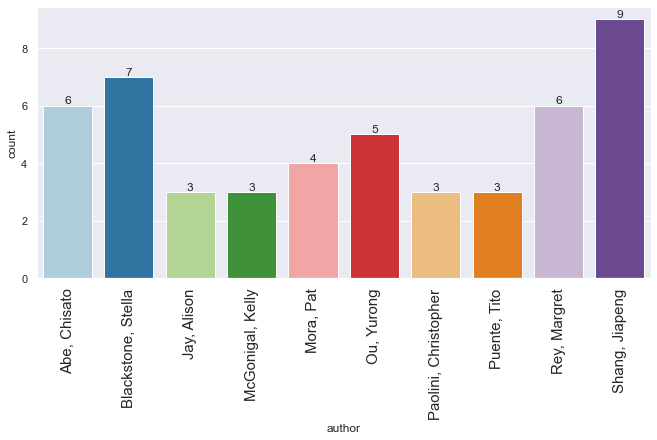

In [39]:
# Now let's visualize top 10 authors (i.e., with an avg. rating of 4 or higher) by the number of published works at VPL

labeled_barplot(data_lang_subset, "author", n=10)

- Shang, Jiapeng ranks # 1 in the list of author's with an avg. rating of 4 or higher for all their works sorted in a descending order by the number of published work at VPL

### Summary 

- The languages carried by a VPL branch provides an insight into the international demographic of that particular region!
  - All locations carried Chinese language material, & all but 1 carried French language. This was followed by 7 locations carrying Spanish & 4 locations carrying Vietnamese language material
    
    
- Across all VPL locations & online, maximum material is available in French & Chinese languages (19K+), followed by Japanese & Korean languages (5K+), and then Spanish language. Tagalog, Hindi & Punjabi languages have some of the lowest number of material available


- Analyzing top author's by most material at VPL, we discovered an author Higashino, Keigo leading, across several Asian languages. Further analysis was performed to see how his work is rated by users/readers across languages


- Language vs category analysis revealed the following:
  - ~60% of material in Hindi language is DVDs 
  - ~10% of material in Italian & German languages is Music CD, & ~5% is DVDs
  - ~20% of material in French language is eBooks, more so than any other languages
  - Korean, French & Japanese languages have a higher percentage of material as comic books than other languages


-  Similarly, availability status vs category information revealed that a major percentage of streaming video & eBooks, and a minor percentage of newspapers & journals do not have any availability information available. In terms of material with status "All copies in use", majority are books (78%), followed by DVDs(9.5%) and then comic books (5%)


- Author's were further categorized by popularity (i.e., user rating) & number of published material at VPL

### Challenges & Next Steps

- Because of the nature of the website & type of information, all of the data collected was categorical & not numerical in nature. As a result not much scope for feature engineering  


- The data collected has limited analysis & inference scope as it pertains to only those records available on VPL website. More data needs to be collected on popular international authors & merged with the data collected at VPL to see whether VPL carries popular material or not


- User information is not private, so unable to determine what the user preference is. Having this information can enable interesting predictions on what material is more popular & in demand for library to plan it's stocking & sourcing accordingly